## Task 1

In [72]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import Ridge, Lasso

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [69]:
def gen_data(N, correlation=0.5):
  # start from 4 independent features:
    X = np.random.uniform(-1., 1., size=(N, 4))
    y = X @ [2.3, -4.7, -1.7, 3.2] # true dependence

  # add correlations, so that X[:,0] correlates with X[:,2] and
  # X[:,1] correlates with X[:,3]:
    X[:,2:] = correlation * X[:,:2] + (1 - correlation) * X[:,2:]

  # add some noise to the targets
    y += np.random.normal(size=y.shape)
    return X, y
X,y = gen_data(200)
data = pd.DataFrame(X)
data['y'] = 0
data.y = y
data

,0,1,2,3,y
0,0.937874,-0.107456,0.479931,-0.046819,1.638612
1,-0.454257,0.746715,-0.658897,0.501183,-2.863854
2,0.858877,0.750872,0.389499,0.262201,-2.606820
3,-0.671412,0.379365,0.022373,0.063484,-4.904265
4,-0.256494,0.127501,-0.385057,-0.348149,-5.240527
...,...,...,...,...,...
195,-0.829730,-0.955459,-0.757437,-0.208579,5.243599
196,0.403887,-0.516158,-0.019191,-0.464623,3.242320
197,0.767901,-0.375168,0.454336,-0.274845,1.328377
198,-0.397334,-0.332343,-0.060309,0.092695,0.190070


In [70]:
columns = [0, 1, 2, 3]

X_subset = data[columns]
X_subset /= X_subset.max()

mse =  0.9776535907818557


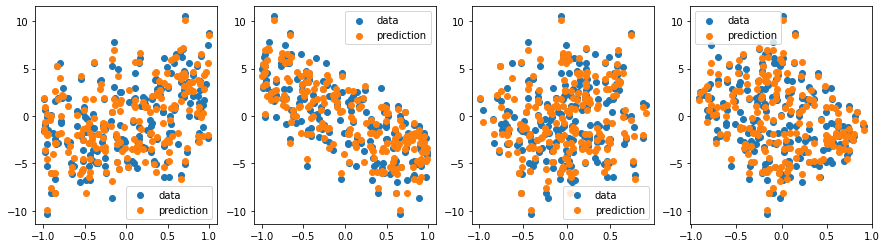

In [71]:
model = make_pipeline(
    PolynomialFeatures(3, include_bias=False), 
    LinearRegression()
)

model.fit(X_subset, y)
print('mse = ', mean_squared_error(y, model.predict(X_subset)))

plt.figure(figsize=(15, 4))
for i, c in enumerate(columns, 1):
  plt.subplot(1, len(columns), i)
  plt.scatter(data[c], y, label='data')
  plt.scatter(data[c], model.predict(X_subset), label='prediction')
  plt.legend()

100%|████████████████████████████████████████████████████████████████████████████████| 100/100 [00:21<00:00,  4.62it/s]


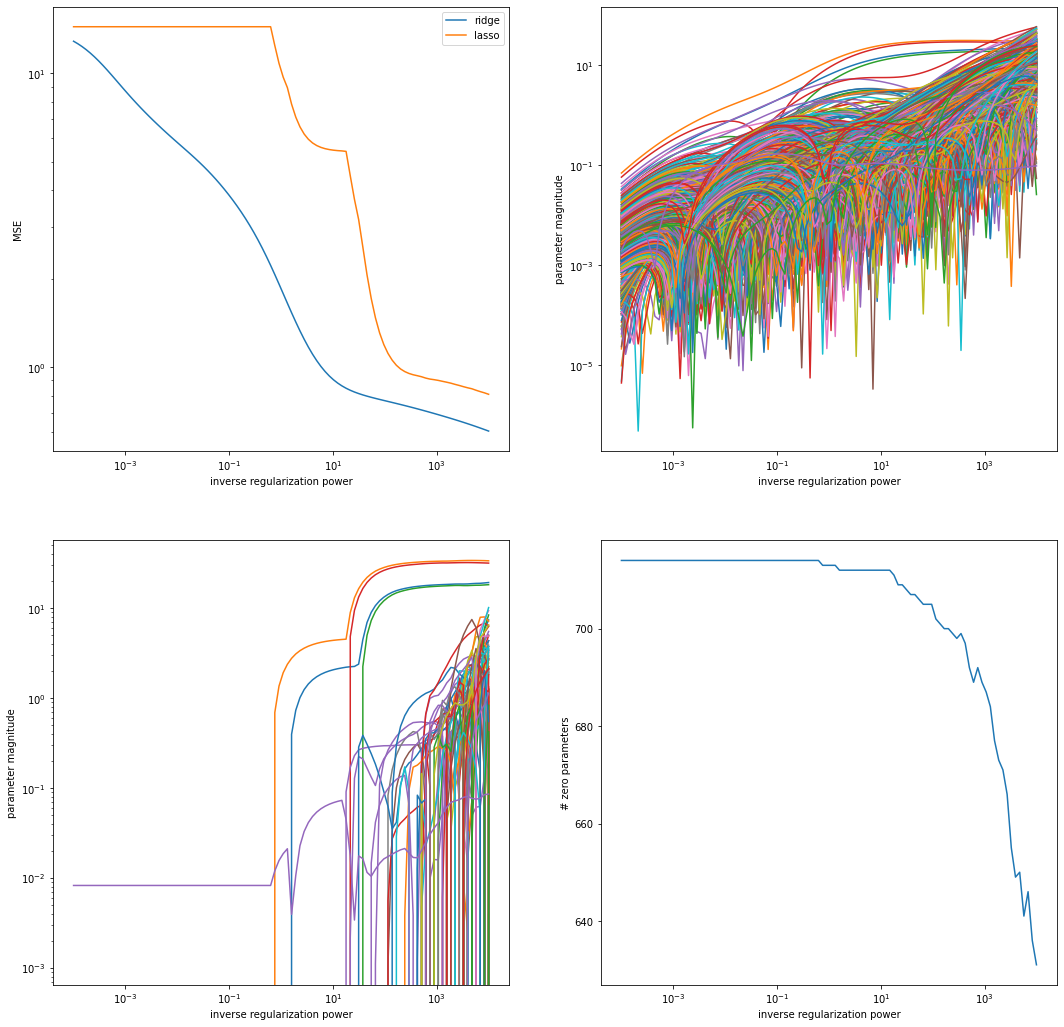

In [93]:
from tqdm import tqdm

for correlation in [0.1, 0.5, 0.9]:
  # dataset to fit (no need to split into train/test in this task):
    X, y = gen_data(500, correlation)

  # regularization powers:
    alpha_values = np.logspace(-4, 4, 100, base=10)

  # lists to collect models' parameters:
    params_ridge = []
    params_lasso = []
    mse_ridge = []
    mse_lasso = []
    for alpha in tqdm(alpha_values):
        linear_model_ridge = Ridge(alpha=alpha)
        linear_model_lasso = Lasso(alpha=alpha, max_iter=1000000)
        
        model_ridge = make_pipeline(
            PolynomialFeatures(9, include_bias=False),
            linear_model_ridge)
        model_lasso = make_pipeline(
            PolynomialFeatures(9, include_bias=False),
            linear_model_lasso)
        
        model_ridge.fit(X, y)
        model_lasso.fit(X, y)
        
        params_ridge.append(
            np.append(linear_model_ridge.coef_,
                      linear_model_ridge.intercept_))
        params_lasso.append(
            np.append(linear_model_lasso.coef_,
                      linear_model_lasso.intercept_))
        
        mse_ridge.append(mean_squared_error(y, model_ridge.predict(X)))
        mse_lasso.append(mean_squared_error(y, model_lasso.predict(X)))
        
    params_ridge = np.array(params_ridge)
    params_lasso = np.array(params_lasso)

plt.figure(figsize=(18, 18))

plt.subplot(2, 2, 1)
plt.plot(1. / alpha_values, mse_ridge, label='ridge')
plt.plot(1. / alpha_values, mse_lasso, label='lasso')
plt.ylabel('MSE')
plt.xlabel('inverse regularization power')
plt.legend()
plt.xscale('log')
plt.yscale('log')

plt.subplot(2, 2, 2)
plt.plot(1. / alpha_values, np.abs(params_ridge));
plt.xlabel("inverse regularization power")
plt.ylabel("parameter magnitude")
plt.xscale('log')
plt.yscale('log')

plt.subplot(2, 2, 3)
plt.plot(1. / alpha_values, np.abs(params_lasso));
plt.xlabel("inverse regularization power")
plt.ylabel("parameter magnitude")
plt.xscale('log')
plt.yscale('log')

plt.subplot(2, 2, 4)
plt.plot(1. / alpha_values, np.isclose(params_lasso, 0.).sum(axis=1));
plt.xlabel("inverse regularization power")
plt.ylabel("# zero parameters")
plt.xscale('log')